## **Impacto del COVID19 en las características estructurales y de conexión de los componentes del índice S&P Latam40 del mercado bursátil Latinoamericano.**

In [ ]:
#Importar Librerias
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Definir rangos de fechas
start1 = '2019-03-01'
end1 = '2020-02-28'
start2 = '2020-03-01'
end2 = '2021-02-28'
start3 = '2021-03-01'
end3 = '2022-02-28'

In [ ]:
#Vectorizar tickets (Nemotecnicos de empresas)
tickets = ['ABEV','AMXL.MX','B3SA3.SA','BBD','BSAC','CHILE.SN','BBAS3.SA','CIB','BRFS','CCRO3.SA',
           'CEMEXCPO.MX','CENCOSHOPP.SN','BAP','EC','CMPC.SN','COPEC.SN','ENELAM.SN','FEMSAUBD.MX','FUNO11.MX','GGB',
           'GFNORTEO.MX','GMEXICOB.MX','TLEVISACPO.MX','ISA.CL','ITUB','ITSA4.SA','RENT3.SA','LREN3.SA','MGLU3.SA','NTCO3.SA',
           'PAGS','PBR','RDOR3.SA','FALABELLA.SN','SQM','SCCO','STNE','VALE','WMT.MX','WEGE3.SA']


In [ ]:
#Vectorizar tickets (Nemotecnicos de empresas)
PriceAdj1 = yf.download(tickets, start=start1, end=end1)['Adj Close']
PriceAdj2 = yf.download(tickets, start=start2, end=end2)['Adj Close']
PriceAdj3 = yf.download(tickets, start=start3, end=end3)['Adj Close']


[*********************100%***********************]  40 of 40 completed

ERROR 
2 Failed downloads:
ERROR:yfinance:
2 Failed downloads:
ERROR ['AMXL.MX']: Exception('AMXL.MX: No timezone found, symbol may be delisted')
ERROR:yfinance:['AMXL.MX']: Exception('AMXL.MX: No timezone found, symbol may be delisted')
ERROR ['RDOR3.SA']: Exception("RDOR3.SA: Data doesn't exist for startDate = 1551409200, endDate = 1582858800")
ERROR:yfinance:['RDOR3.SA']: Exception("RDOR3.SA: Data doesn't exist for startDate = 1551409200, endDate = 1582858800")



[*********************100%***********************]  40 of 40 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['AMXL.MX']: Exception('AMXL.MX: No timezone found, symbol may be delisted')
ERROR:yfinance:['AMXL.MX']: Exception('AMXL.MX: No timezone found, symbol may be delisted')



[*********************100%***********************]  40 of 40 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['AMXL.MX']: Exception('AMXL.MX: No timezone found, symbol may be delisted')
ERROR:yfinance:['AMXL.MX']: Exception('AMXL.MX: No timezone found, symbol may be delisted')


**Identificar Data Missing**

In [ ]:
#Identificar datos faltantes en PriceAdj1
print("Hay {} datos".format(len(PriceAdj1)))

for i in PriceAdj1.columns:
    print("Hay {} ({}%) datos faltantes en la columna {}".format(len(PriceAdj1[PriceAdj1[i].isna()]), np.round(len(PriceAdj1[PriceAdj1[i].isna()])/len(PriceAdj1)*100,2), i))

In [ ]:
#Identificar datos faltantes en PriceAdj2
print("Hay {} datos".format(len(PriceAdj2)))

for i in PriceAdj2.columns:
    print("Hay {} ({}%) datos faltantes en la columna {}".format(len(PriceAdj2[PriceAdj2[i].isna()]), np.round(len(PriceAdj2[PriceAdj2[i].isna()])/len(PriceAdj2)*100,2), i))

In [ ]:
#Identificar datos faltantes en PriceAdj3
print("Hay {} datos".format(len(PriceAdj3)))
for i in PriceAdj3.columns:

    print("Hay {} ({}%) datos faltantes en la columna {}".format(len(PriceAdj3[PriceAdj3[i].isna()]), np.round(len(PriceAdj3[PriceAdj3[i].isna()])/len(PriceAdj3)*100,2), i))

In [ ]:
#Excluyendo tickets en PriceAdj1
data1 = PriceAdj1.drop(['CENCOSHOPP.SN', 'NTCO3.SA', 'RDOR3.SA', 'AMXL.MX' ], axis=1)
data2 = PriceAdj2.drop(['CENCOSHOPP.SN', 'NTCO3.SA', 'RDOR3.SA', 'AMXL.MX'], axis=1)
data3 = PriceAdj3.drop(['CENCOSHOPP.SN', 'NTCO3.SA', 'RDOR3.SA', 'AMXL.MX'], axis=1)

In [ ]:
data1

In [ ]:
#Separando la variable date de la serie
#dates1 = data1.index
#dates2 = data2.index
#dates3 = data3.index

In [ ]:
# Separar el resto de la serie de tiempo a un DataFrame para imputar los valores faltantes
#values = data1.pop(Tickets)


**Imputando Data Missing**
**#Metodo: KNN (K-NEAREST NEIGHBOR)**

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

In [ ]:
#Imputando data missing (KNN) en data1
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(data1)
# transform the dataset
dat1 = imputer.transform(data1)
imputed_data1=round(pd.DataFrame(dat1,columns=data1.columns),2)
imputed_data1

,ABEV,B3SA3.SA,BAP,BBAS3.SA,BBD,BRFS,BSAC,CCRO3.SA,CEMEXCPO.MX,CHILE.SN,...,PAGS,PBR,RENT3.SA,SCCO,SQM,STNE,TLEVISACPO.MX,VALE,WEGE3.SA,WMT.MX
0,3.79,9.00,237.19,38.58,7.66,5.46,24.30,12.20,9.20,77.63,...,27.97,6.50,30.26,29.10,31.02,31.13,42.19,9.11,8.68,1883.33
1,3.78,8.98,239.66,39.13,7.65,5.42,24.61,11.56,9.10,78.08,...,28.39,6.53,30.53,29.07,30.75,32.00,41.64,9.13,8.82,1853.59
2,3.78,8.98,236.03,39.13,7.72,5.31,24.44,11.56,8.94,76.88,...,28.53,6.57,30.53,29.49,31.04,32.19,40.37,9.31,8.82,1853.59
3,3.65,8.92,238.68,38.07,7.49,5.17,24.35,12.01,8.95,77.48,...,27.60,6.42,30.40,29.39,30.39,31.00,38.75,9.18,8.79,1877.97
4,3.67,8.77,234.37,38.36,7.47,5.05,23.92,11.11,8.86,77.91,...,26.97,6.31,29.83,29.10,29.69,29.03,38.58,9.26,8.76,1902.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,3.25,15.12,197.63,38.99,6.29,6.92,15.47,16.71,7.10,60.19,...,36.58,5.94,51.97,31.86,26.20,43.48,41.50,8.62,23.82,2231.95
256,3.17,13.65,192.37,38.74,6.09,6.70,14.78,15.74,7.05,59.36,...,34.68,5.54,43.73,30.42,25.13,41.78,41.20,7.97,14.86,2212.01
257,3.19,13.30,186.35,37.60,5.98,6.57,14.57,14.93,6.90,59.45,...,34.03,5.43,41.50,29.50,24.48,41.00,38.48,7.78,13.81,2190.57
258,3.16,13.93,187.87,36.15,5.90,6.39,14.76,15.31,6.44,60.00,...,34.57,5.32,48.37,29.48,23.97,41.57,38.18,7.68,22.48,2180.19


In [ ]:
#Imputando data missing (KNN) en data2
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(data2)
# transform the dataset
dat2 = imputer.transform(data2)
imputed_data2=round(pd.DataFrame(dat2,columns=data2.columns),2)
imputed_data2

In [ ]:
#Imputando data missing (KNN) en data3
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(data3)
# transform the dataset
dat3 = imputer.transform(data3)
imputed_data3=round(pd.DataFrame(dat3,columns=data3.columns),2)
imputed_data3

**Evaluacion de la calidad de la imputacion**

In [ ]:
#Tecnica: Error cuadratico medio MSE en escenario 1
datos_reales = np.array(data1)
datos_imputados = np.array(imputed_data1)
# Identificar y eliminar los elementos NaN en los datos reales y los datos imputados
mask = ~np.isnan(datos_reales)
datos_reales = datos_reales[mask]
datos_imputados = datos_imputados[mask]
# Calcular el MSE para los datos restantes
mse1 = mean_squared_error(datos_reales, datos_imputados)
print("El MSE para los datos imputados es:", round(mse1, 8))

El MSE para los datos imputados es: 7.66e-06


In [ ]:
#Tecnica: Error cuadratico medio MSE en escenario 2
datos_reales = np.array(data2)
datos_imputados = np.array(imputed_data2)
# Identificar y eliminar los elementos NaN en los datos reales y los datos imputados
mask = ~np.isnan(datos_reales)
datos_reales = datos_reales[mask]
datos_imputados = datos_imputados[mask]
# Calcular el MSE para los datos restantes
mse2 = mean_squared_error(datos_reales, datos_imputados)
print("El MSE para los datos imputados es:", round(mse2, 8))

El MSE para los datos imputados es: 7.63e-06


In [ ]:
#Tecnica: Error cuadratico medio MSE en escenario 3
datos_reales = np.array(data3)
datos_imputados = np.array(imputed_data3)
# Identificar y eliminar los elementos NaN en los datos reales y los datos imputados
mask = ~np.isnan(datos_reales)
datos_reales = datos_reales[mask]
datos_imputados = datos_imputados[mask]
# Calcular el MSE para los datos restantes
mse3 = mean_squared_error(datos_reales, datos_imputados)
print("El MSE para los datos imputados es:", round(mse3, 8))

El MSE para los datos imputados es: 7.25e-06


In [ ]:
#Calcular la media de los MSE obtenidos de los tres escenarios
# Crear una lista con los valores del MSE
mse_values = [mse1, mse2, mse3]
# Calcular la media utilizando numpy.mean()
mse_mean = np.mean(mse_values)
# Imprimir el resultado
print("La media de los MSE es:", mse_mean)

La media de los MSE es: 7.512994767370004e-06


**Revisar si fue correcta la imputacion**

In [ ]:
#Volver a identificar datos faltantes en imputed_data1 posterior a la imputacion por KNN
print("Hay {} datos".format(len(imputed_data1)))
for i in imputed_data1.columns:
    print("Hay {} ({}%) datos faltantes en la columna {}".format(len(imputed_data1[imputed_data1[i].isna()]), np.round(len(imputed_data1[imputed_data1[i].isna()])/len(imputed_data1)*100,2), i))

In [ ]:
#Volver a identificar datos faltantes en imputed_data2 posterior a la imputacion por KNN
print("Hay {} datos".format(len(imputed_data2)))
for i in imputed_data2.columns:
    print("Hay {} ({}%) datos faltantes en la columna {}".format(len(imputed_data2[imputed_data2[i].isna()]), np.round(len(imputed_data2[imputed_data2[i].isna()])/len(imputed_data2)*100,2), i))

In [ ]:
#Volver a identificar datos faltantes en matrix3 posterior a la imputacion por KNN
print("Hay {} datos".format(len(imputed_data3)))
for i in imputed_data3.columns:
    print("Hay {} ({}%) datos faltantes en la columna {}".format(len(imputed_data3[imputed_data3[i].isna()]), np.round(len(imputed_data3[imputed_data3[i].isna()])/len(imputed_data3)*100,2), i))

**Outliers**

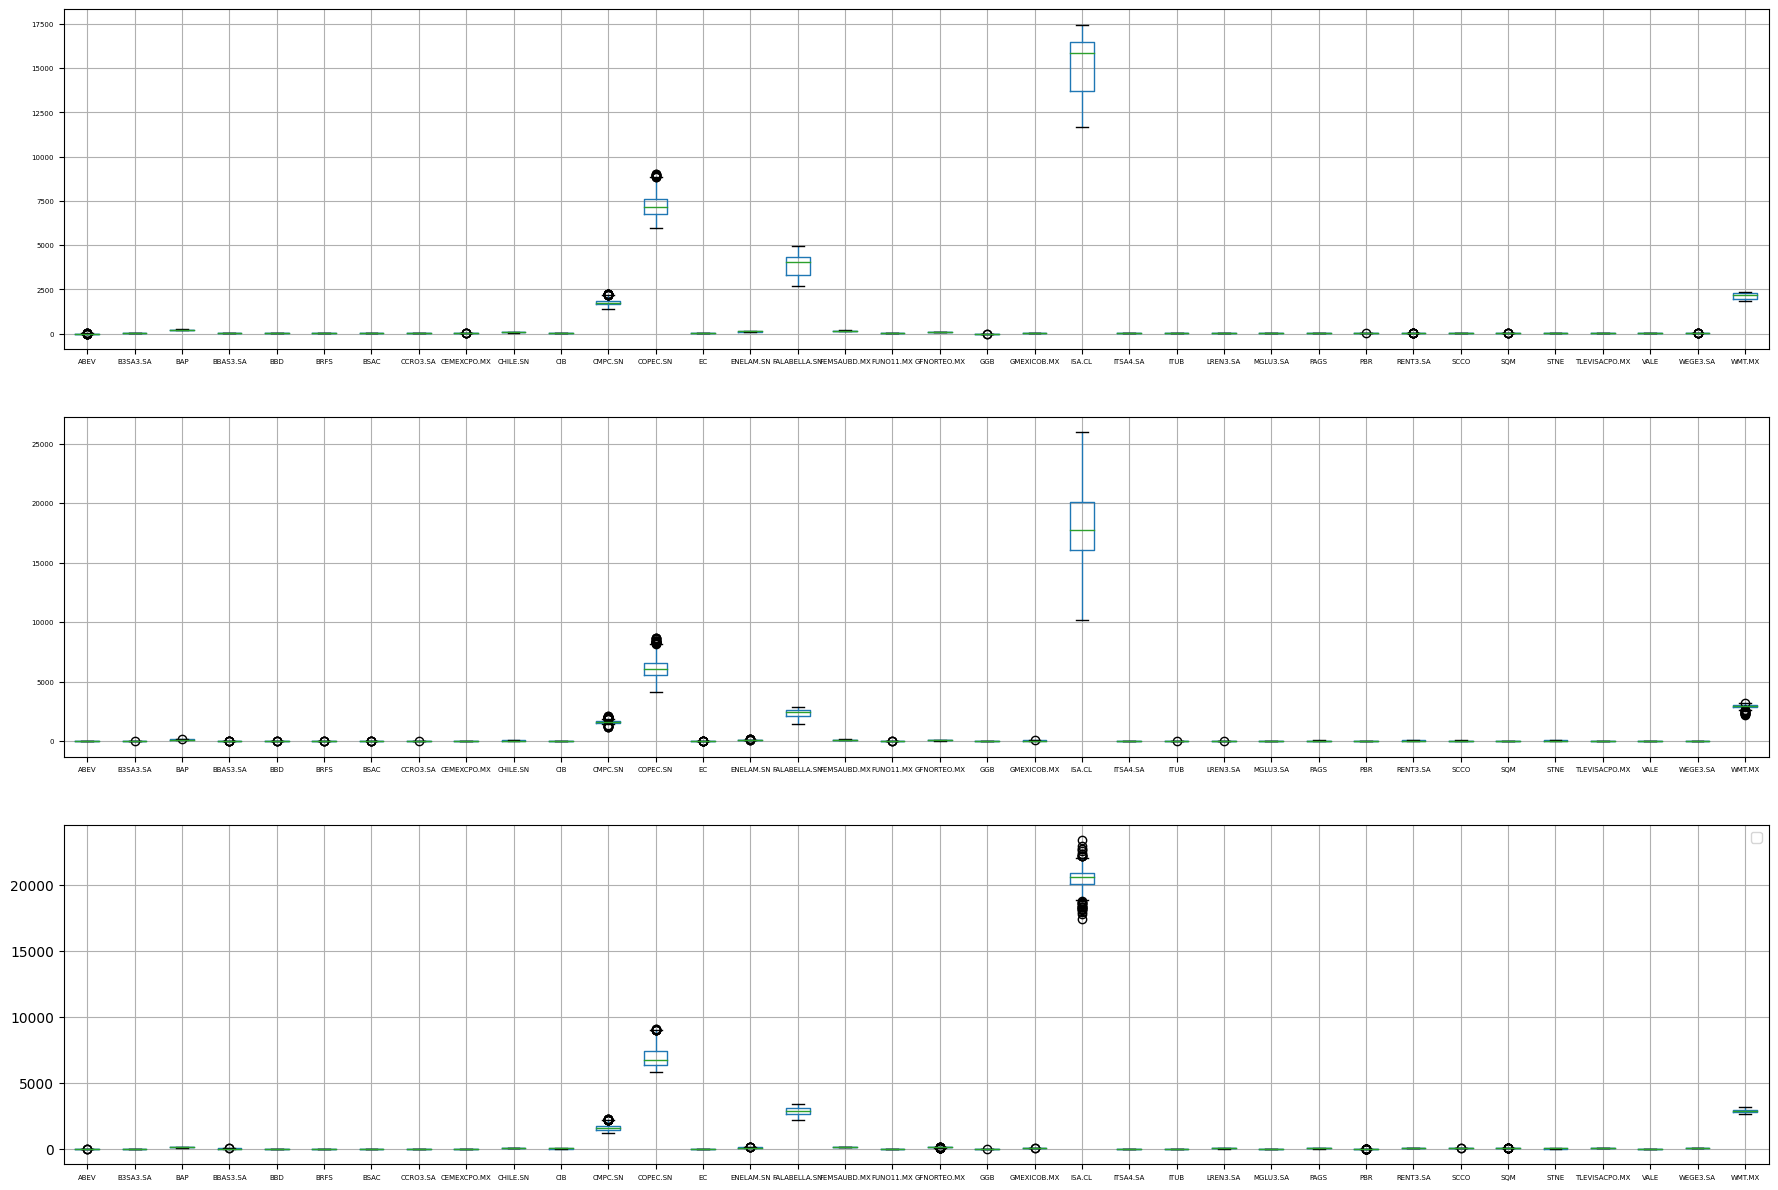

In [ ]:
#Identificar Outliers en imputed_data 1,2 y 3
plt.figure(figsize=(22,15))
plt.subplot(311)
imputed_data1.boxplot(grid=True,fontsize=5 )
plt.subplot(312)
imputed_data2.boxplot(grid=True,fontsize=5)
plt.subplot(313)
imputed_data3.boxplot(grid=True,fontsize=5)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
#Funcion para Contar y reemplazar outliers con el metodo IQR en imputed_data 1,2 y 3
def eliminar_outliers(df):
    # Calcular los límites para identificar outliers
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identificar y contar los outliers en cada columna
    outliers_count = (df < lower_bound) | (df > upper_bound)
    outliers_count = pd.DataFrame(outliers_count)  # Convertir a DataFrame

    # Eliminar los outliers del DataFrame
    df_sin_outliers = df[~outliers_count.any(axis=1)]

    return df_sin_outliers, outliers_count


def aplicar_eliminar_outliers(dataframes):
    resultados = {}

    for nombre, df in dataframes.items():
        df_sin_outliers, _ = eliminar_outliers(df)

        # Guardar el DataFrame sin outliers en el diccionario
        resultados[nombre] = df_sin_outliers

    return resultados

In [ ]:
#Aplicando la funcion en imputed_data 1, 2 y 3

# Crear un diccionario con los nombres de los DataFrames y los DataFrames correspondientes
dataframes = {
    'imputed_data1': imputed_data1,
    'imputed_data2': imputed_data2,
    'imputed_data3': imputed_data3
}

# Aplicar la función eliminar_outliers a los DataFrames y obtener los resultados
resultados = aplicar_eliminar_outliers(dataframes)

# Resultados individuales
for nombre, df_sin_outliers in resultados.items():
    print(f"Resultados para {nombre}:")
    print("DataFrame sin outliers:")
    print(df_sin_outliers)
    print()

In [ ]:
dataclean1 = resultados['imputed_data1']
dataclean2 = resultados['imputed_data2']
dataclean3 = resultados['imputed_data3']

Validacion de eliminacion de outliers (por definir)

**Prueba de no estacionariedad**

In [ ]:
#Hipótesis nula: La serie de tiempo es no estacionaria (Pvalue > 0,05)
#Hipótesis alternativa: La serie de tiempo es estacionaria (Pvalue < 0,05)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Calcular rendimientos logaritmicos para normalizar los datos en una misma escala
log_rtn1 =np.log(dataclean1/dataclean1.shift(1))
#Eliminando NaN generados en primera linea por calculo de Log_rtn
log_rtn1 = log_rtn1.dropna()
log_rtn1

In [ ]:
# Convertir la serie de tiempo en un array unidimensional
# Crear una lista para almacenar los resultados de la prueba ADF para cada columna
adf_results = []
adf_results

[]

In [ ]:
# Realizar la prueba ADF para cada columna y almacenar los resultados en la lista
for col in log_rtn1.columns:
    result = adfuller(log_rtn1[col])
    adf_results.append(result[1])

In [ ]:
# Calcular el promedio de los resultados de la prueba ADF para cada columna
mean_pvalues = sum(adf_results) / len(adf_results)
mean_pvalues

0.0013531852108489215

In [ ]:
# Imprimir el resultado
if mean_pvalues < 0.05:
    print("Se rechaza la hipótesis nula: La serie de tiempo es estacionaria.")
else:
    print("No se puede rechazar la hipótesis nula:  La serie de tiempo es no estacionaria.")

Se rechaza la hipótesis nula: La serie de tiempo es estacionaria.


**Calculo de Correlaciones lineales (Pearson)**

In [ ]:
#Calcular matrices de coeficientes de correlacion lineal (Pearson)
Coefcorr1 = dataclean1.corr()
Coefcorr2 = dataclean2.corr()
Coefcorr3 = dataclean3.corr()

<Axes: >

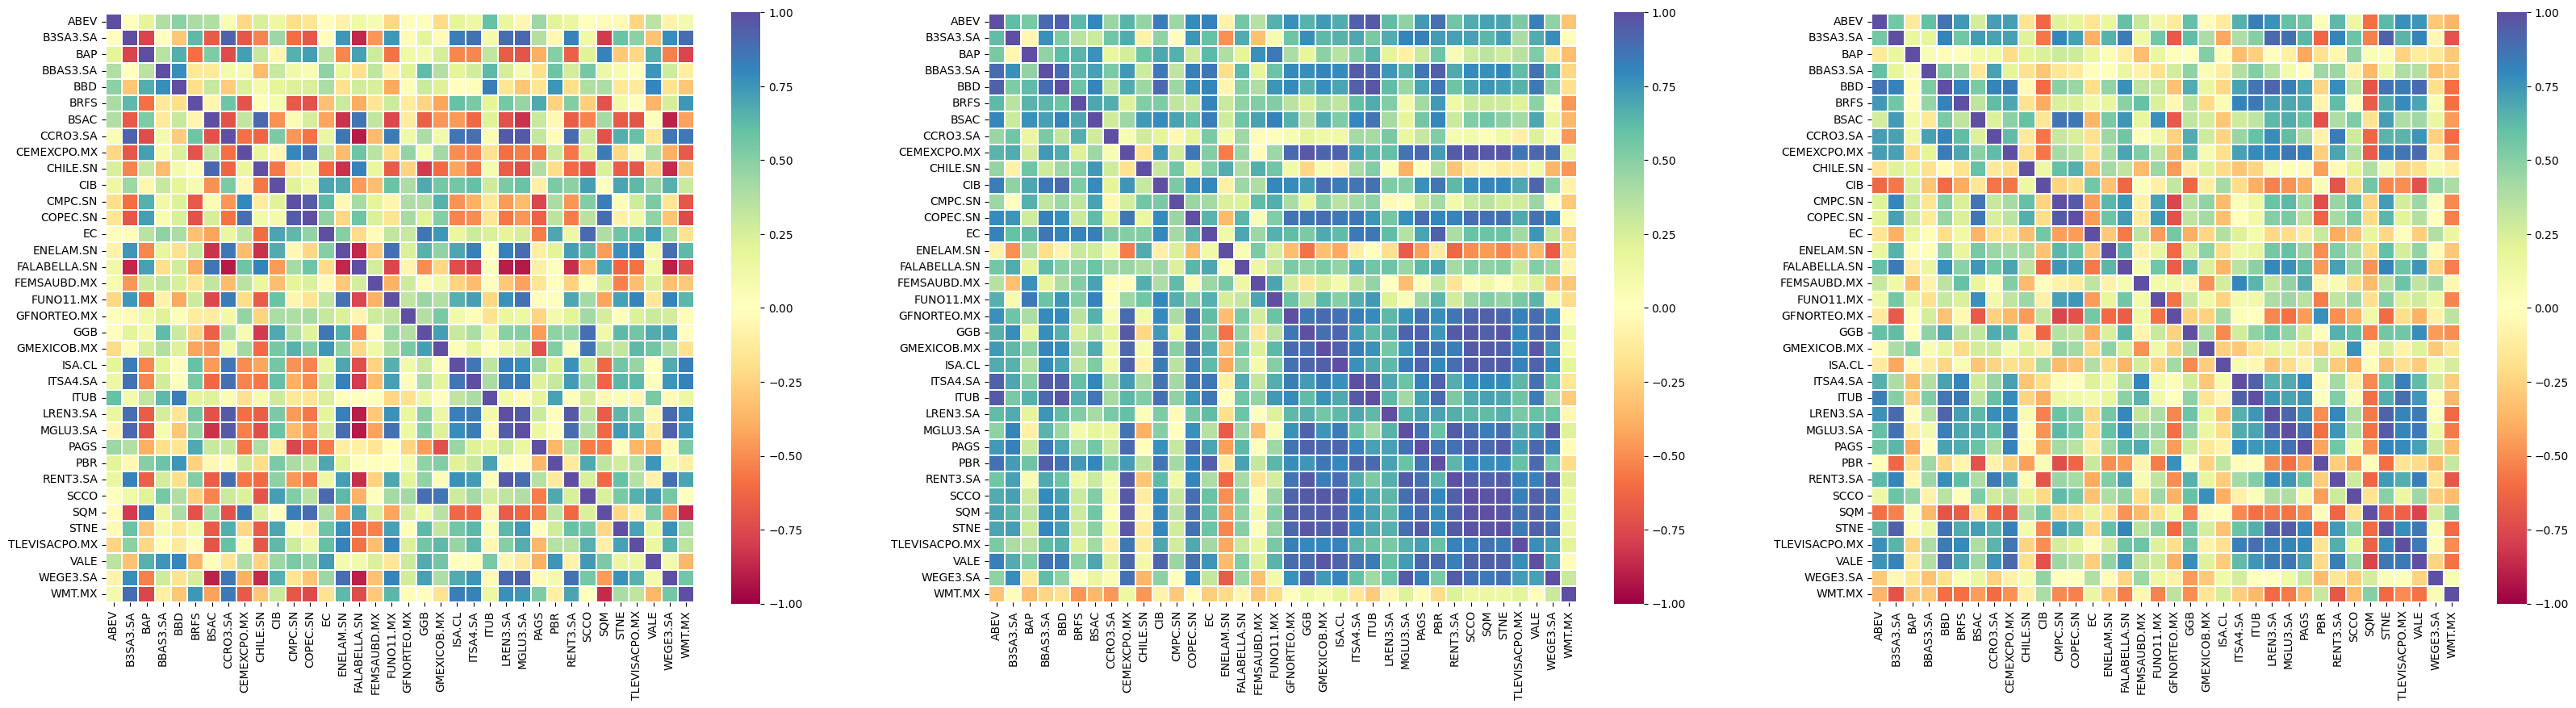

In [ ]:
#Graficar matrices de correlaciones lineales
plt.figure(figsize=(40, 30))
plt.subplot(131)
sns.heatmap(Coefcorr1, annot=False, annot_kws = {'size':4}, vmax=1, vmin=-1, fmt=',.1f', cmap='Spectral', linewidth=.1, cbar_kws={'shrink': 0.317}, square=True)
plt.subplot(132)
sns.heatmap(Coefcorr2, annot=False, annot_kws = {'size':4}, vmax=1, vmin=-1, fmt=',.1f', cmap='Spectral', linewidth=.1, cbar_kws={'shrink': 0.317}, square=True)
plt.subplot(133)
sns.heatmap(Coefcorr3, annot=False, annot_kws = {'size':4}, vmax=1, vmin=-1, fmt=',.1f', cmap='Spectral', linewidth=.1, cbar_kws={'shrink': 0.317}, square=True)

**Cluster**

In [ ]:
from sklearn.preprocessing import StandardScaler
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Etadisticos descriptivos
dataclean1.describe()

In [ ]:
#Non Null counts
dataclean1.info()

In [ ]:
#Libreria de Correlation Hierarchical Clustering - CHC
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as shc

In [ ]:
# Convertimos la matriz de correlación en una matriz de distancia
distmatrix1 = 1 - Coefcorr1**2
distmatrix2 = 1 - Coefcorr2**2
distmatrix3 = 1 - Coefcorr3**2

In [ ]:
distmatrix1

,ABEV,B3SA3.SA,BAP,BBAS3.SA,BBD,BRFS,BSAC,CCRO3.SA,CEMEXCPO.MX,CHILE.SN,...,PAGS,PBR,RENT3.SA,SCCO,SQM,STNE,TLEVISACPO.MX,VALE,WEGE3.SA,WMT.MX
ABEV,0.000000,0.999979,0.962708,0.857310,0.762893,0.840959,0.857110,0.996674,0.948128,0.938042,...,0.803478,0.955571,0.975043,0.999873,0.999314,0.998669,0.943187,0.881974,0.994463,0.991511
B3SA3.SA,0.999979,0.000000,0.406248,0.999956,0.911059,0.609189,0.546928,0.138514,0.524811,0.725851,...,0.861159,0.997582,0.328941,0.984008,0.347627,0.649144,0.761569,0.901271,0.400121,0.197178
BAP,0.962708,0.406248,0.000000,0.880679,0.549627,0.650120,0.718325,0.457196,0.480627,0.902362,...,0.847031,0.746643,0.574086,0.955277,0.327682,0.919973,0.946507,0.573547,0.711251,0.423709
BBAS3.SA,0.857310,0.999956,0.880679,0.000000,0.400526,0.978392,0.981263,0.991308,0.994545,0.881089,...,0.963889,0.662640,0.932148,0.698493,0.981230,0.994642,0.999163,0.436216,0.921713,0.989423
BBD,0.762893,0.911059,0.549627,0.400526,0.000000,0.959253,0.904595,0.923853,0.944419,0.992551,...,0.974664,0.434816,0.960111,0.854263,0.844451,0.979775,0.982312,0.354324,0.969002,0.910483
BRFS,0.840959,0.609189,0.650120,0.978392,0.959253,0.000000,0.995071,0.667038,0.495523,0.998758,...,0.528855,0.933580,0.727680,0.931725,0.485396,0.989395,0.999779,0.862904,0.936363,0.445382
BSAC,0.857110,0.546928,0.718325,0.981263,0.904595,0.995071,0.000000,0.491443,0.895596,0.174728,...,0.909293,0.998302,0.560296,0.724997,0.827125,0.540322,0.513982,0.999202,0.213137,0.812618
CCRO3.SA,0.996674,0.138514,0.457196,0.991308,0.923853,0.667038,0.491443,0.000000,0.652237,0.599312,...,0.899804,0.999470,0.199322,0.913036,0.484900,0.558651,0.641606,0.973735,0.257180,0.284229
CEMEXCPO.MX,0.948128,0.524811,0.480627,0.994545,0.944419,0.495523,0.895596,0.652237,0.000000,0.971839,...,0.683325,0.920233,0.680183,0.946760,0.297199,0.947926,0.997074,0.848217,0.852071,0.536306
CHILE.SN,0.938042,0.725851,0.902362,0.881089,0.992551,0.998758,0.174728,0.599312,0.971839,0.000000,...,0.859187,0.956879,0.621924,0.508767,0.944294,0.554965,0.526132,0.938916,0.257117,0.909554


In [ ]:
# Realizamos el Clustering Jerárquico
linkagematrix1 = shc.linkage(distmatrix1, method='ward')
linkagematrix2 = shc.linkage(distmatrix2, method='ward')
linkagematrix3 = shc.linkage(distmatrix3, method='ward')

Text(0, 0.5, 'Distancia')

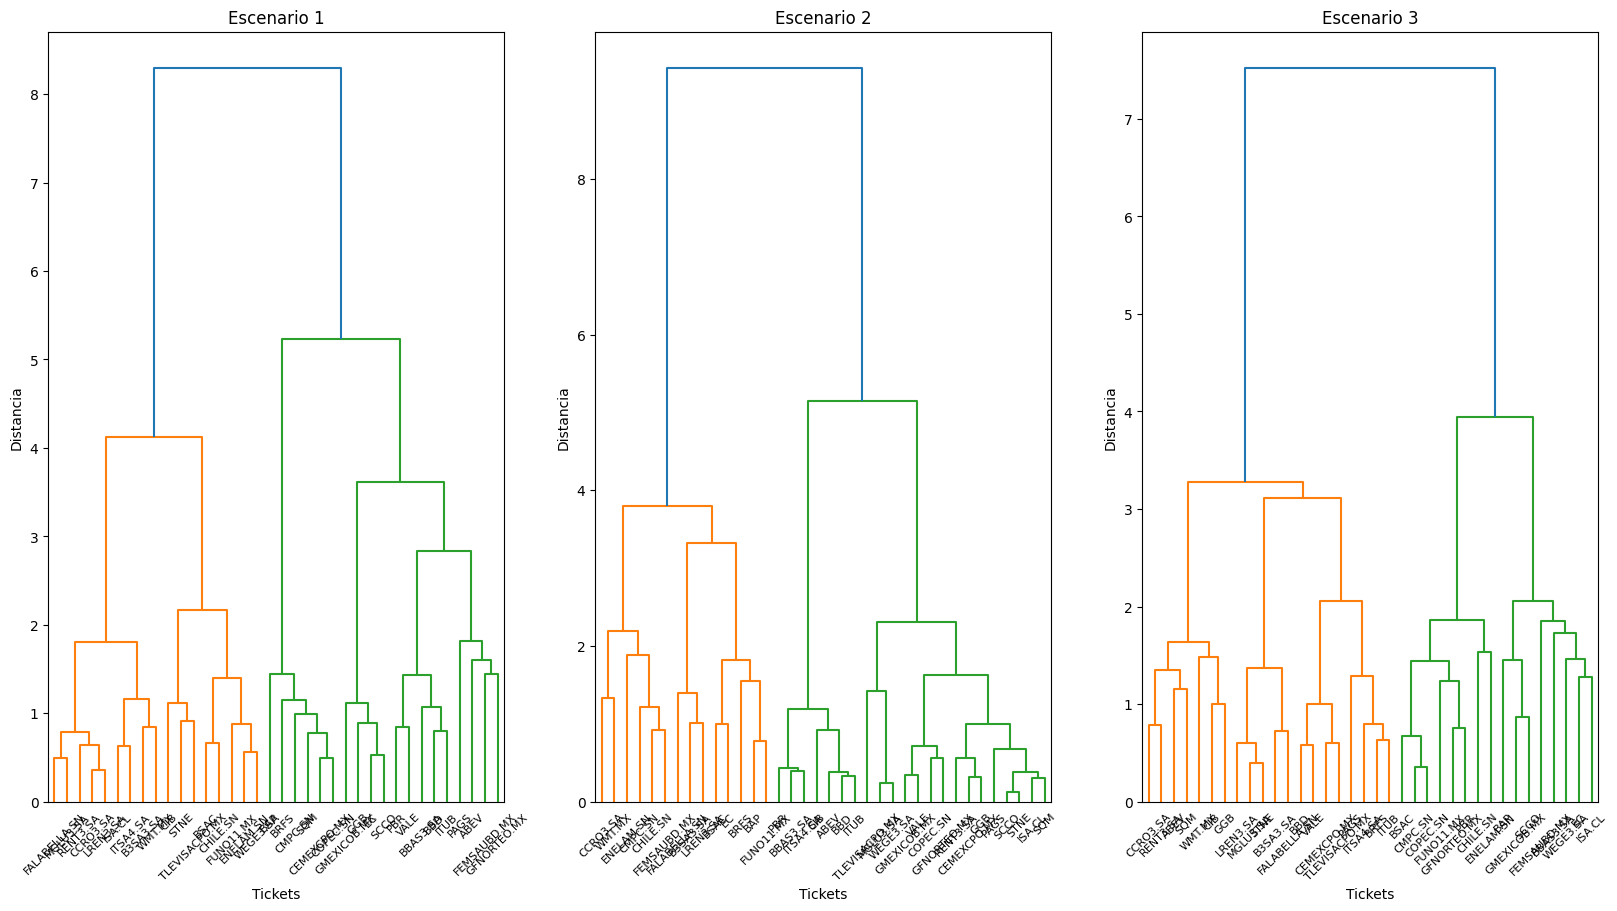

In [ ]:
# Visualizamos los dendrogramas
plt.figure(figsize=(20, 10))
plt.title("Dendogramas")
plt.subplot(131)
dendrogram1 = shc.dendrogram(linkagematrix1, labels=Coefcorr1.columns)
plt.title("Escenario 1")
plt.xlabel("Tickets")
plt.ylabel("Distancia")
plt.subplot(132)
dendrogram2 = shc.dendrogram(linkagematrix2, labels=Coefcorr2.columns)
plt.title("Escenario 2")
plt.xlabel("Tickets")
plt.ylabel("Distancia")
plt.subplot(133)
dendrogram3 = shc.dendrogram(linkagematrix3, labels=Coefcorr3.columns)
plt.title("Escenario 3")
plt.xlabel("Tickets")
plt.ylabel("Distancia")

In [ ]:
# Ordenamos los datos según el Clustering Jerárquico
order = dendrogram1['leaves']
ordered_df = Coefcorr1.iloc[:, order]

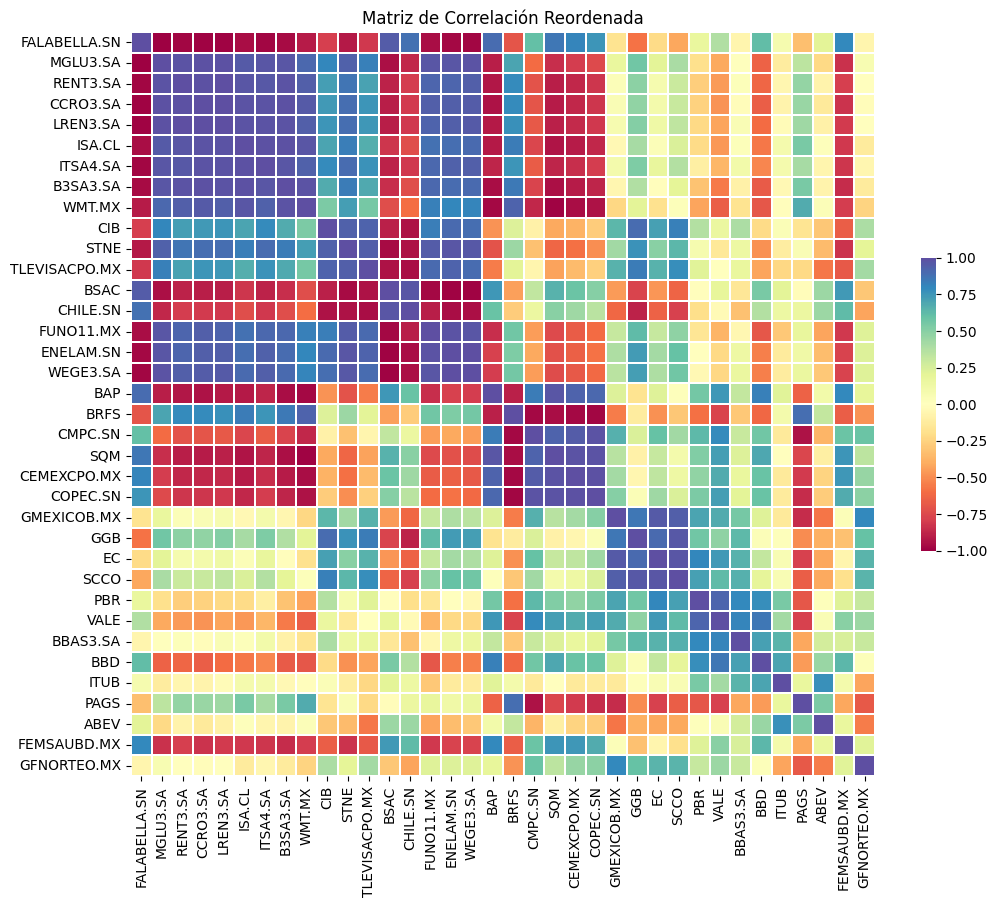

In [ ]:
# Visualizamos la matriz de correlación reordenada
plt.figure(figsize=(12, 12))
sns.heatmap(ordered_df.corr(), annot=False, annot_kws = {'size':4}, vmax=1, vmin=-1, fmt=',.1f', cmap='Spectral', linewidth=.1, cbar_kws={'shrink': 0.317}, square=True)
plt.title("Matriz de Correlación Reordenada")
plt.show()